In [2]:
import numpy as np
import os

import random
import pandas as pd
import math

from matplotlib import gridspec
import itertools
import astropy.units as u
import astropy.constants as const

from ast import literal_eval


from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.ticker as ticker

In [3]:
import sys

from s1s2_0311 import *
from read import *
from recoil_1223 import *

from plot_binned_detection_1d2d_0526 import *

In [4]:

metallicity = 'high'
nuclei_2d = 'Xenon'
footnote = 'thrd'
E_threshold_keV = 0
folder_2d = '../nestpy_unbinned_unbound_thrd0'
file_name_prefix = 'optimized_consecutive_binning_thrd0_'

In [5]:
detectors = ['CJPL', 'Kamioka', 'LNGS', 'SURF', 'SNOlab']

# ATM

In [6]:
signal_pcle  = 'atm'

optimized_consecutive_binning_thrd0_atm.csv
['atmNu_CJPL_avg', 'pp'] optimized_consecutive_binning_thrd0_atm.csv
NR
 ../real_data_nest/pdf/atmNu_CJPL_avg_NR_Xenon_pdf.txt
survival
atmNu_CJPL_avg 0.03605074238375018 1 / (t yr) 10000000
ER
else
 ../real_data_nest/pdf/pp_ER_Ebind_Xenon_pdf_high.txt
survival
pp 368.5118349082348 1 / (t yr) 10000000


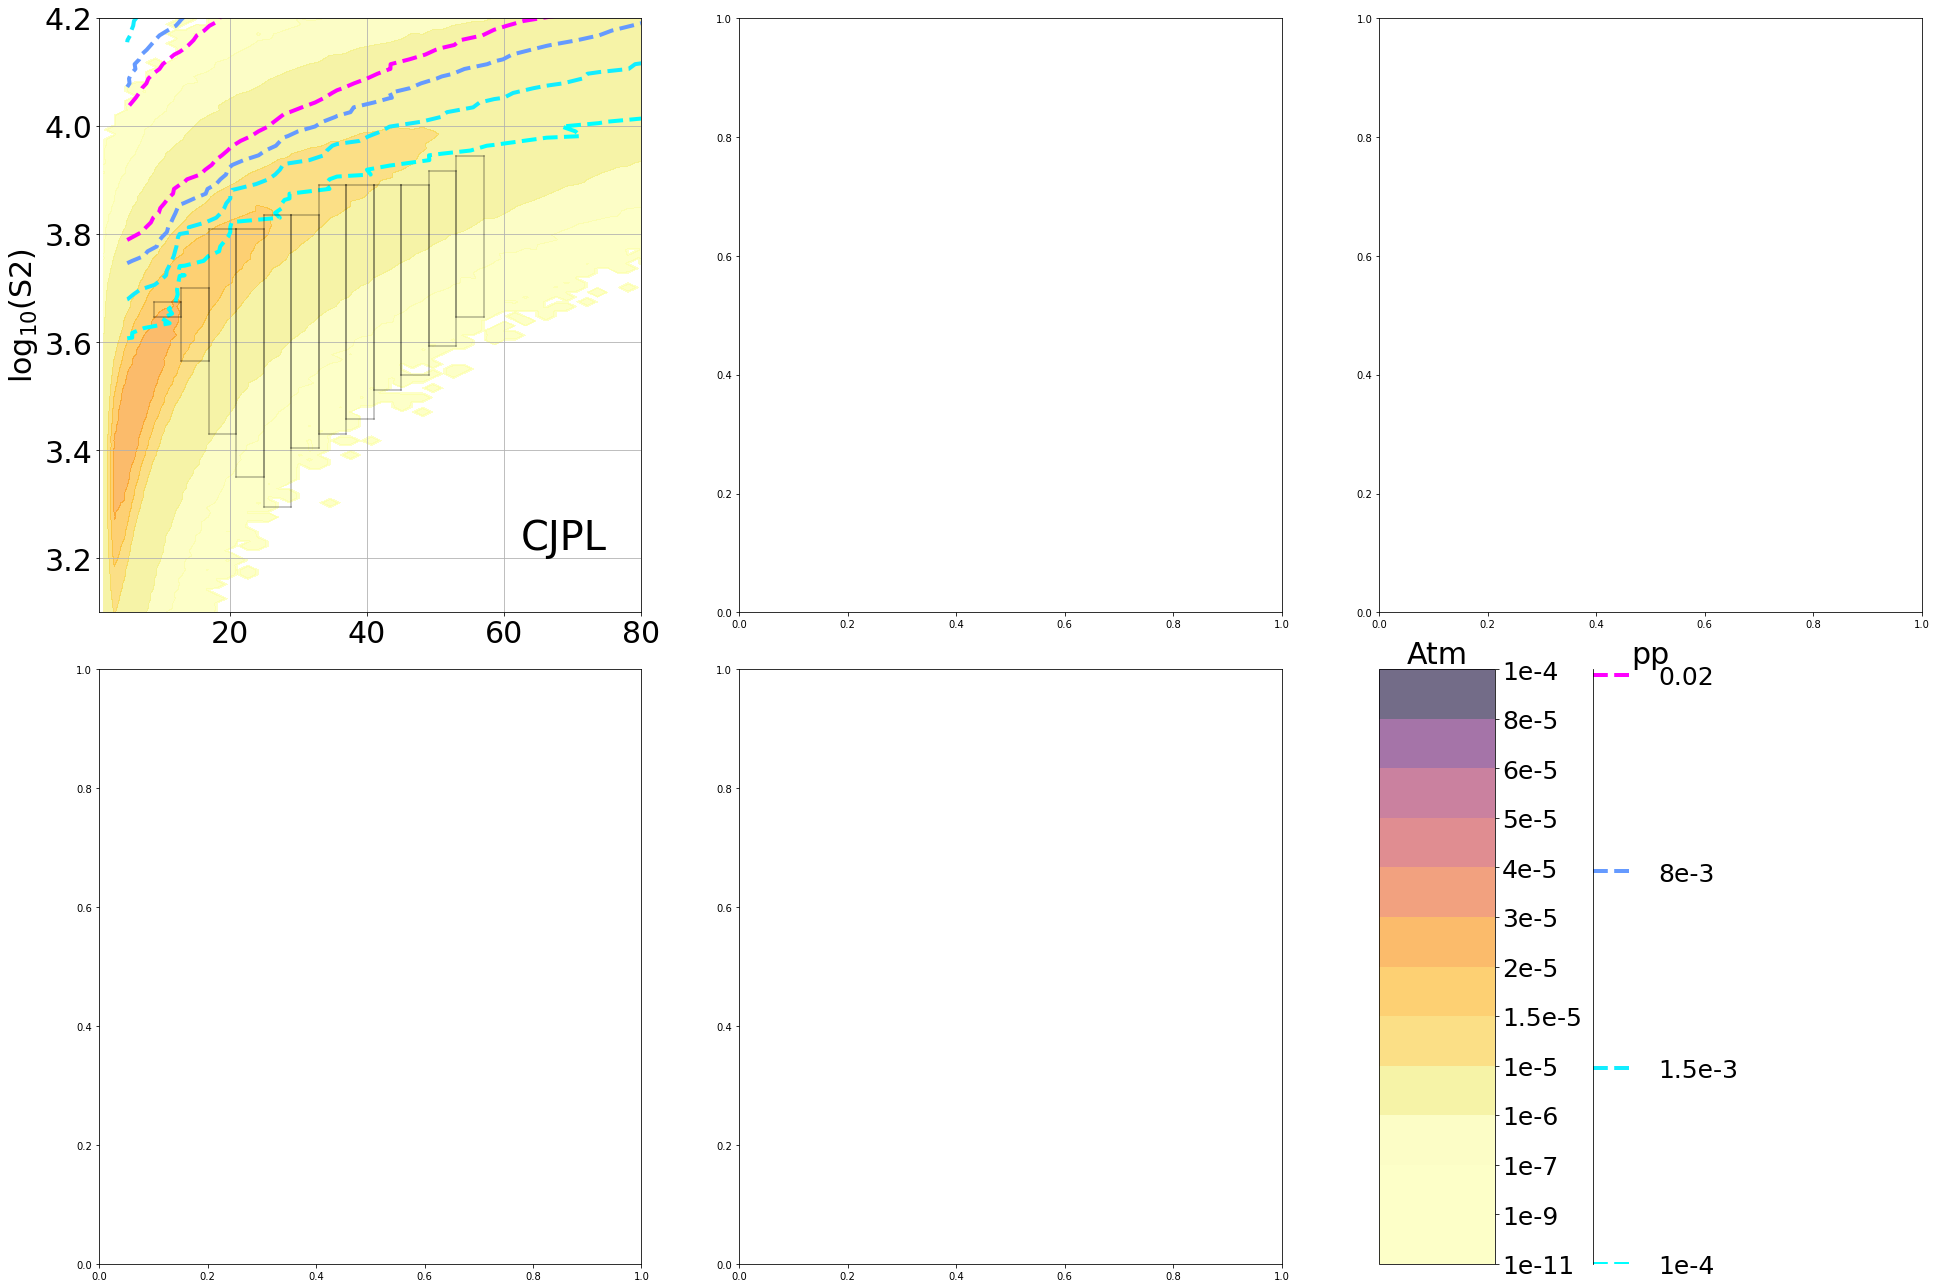

In [10]:
fig = plt.figure(figsize=(9*3 , 9*2 ))
gs = gridspec.GridSpec(2, 9)
ax1 = plt.subplot(gs[0:1,0:3])
ax2 = plt.subplot(gs[0:1,3:6])
ax3 = plt.subplot(gs[0:1,6:9])
ax4 = plt.subplot(gs[1:2,0:3])
ax5 = plt.subplot(gs[1:2,3:6])
axes = (ax1, ax2, ax3, ax4, ax5)

levels_atm = [1e-11, 1e-9, 1e-7,1e-6,  1e-5, 1.5e-5,  2e-5,  3e-5,  4e-5, 5e-5, 6e-5, 8e-5, 1e-4]
levels_pp = [1e-4, 1.5e-3, 8e-3, 2e-2]#[8e-6, 0.003,0.007,0.011]
for det, (detector, ax) in enumerate(zip(detectors[:1], axes)):
    file_name =file_name_prefix +signal_pcle+'.csv'
    optimized_bin_dets = pd.read_csv( file_name, index_col = 0)
    print(file_name)
    
    _, pcles_det, _, _ = get_null_NR(signal_pcle, detector)
    bins_groups_det = [literal_eval(a) for a in 
                       [subbin for subbin in list(optimized_bin_dets[detector]) if str(subbin)!='nan']]
    pcles_det+=['pp']
    print(pcles_det, file_name)
    
    
    if det == 2 or det ==3 or det ==4:
        xlabel = 'S1'
    else:
        xlabel = ''
    if det == 0 or det ==3:
        ylabel = r'log$_{10}$(S2)'
    else:
        ylabel = ''
    ax = setup_cdfpdf_ax(ax, '' , xlabel, ylabel, True, '', 30, 30, 
                        vlines = [0,0], hlines = [0,0], 
                             xlims = [1, 80], ylims = [3.1, 4.2], log = [0,0])
    ax.text(75, 3.2, detector, 
                          horizontalalignment='right', verticalalignment='bottom',
                          fontsize = 40)
    
    for pcle_det in pcles_det:
        file_name_S1S2 = os.path.join(folder_2d, 'S1S2_'+pcle_det+'.csv')


        dataf = pd.read_csv(file_name_S1S2)
        eff_num = len(dataf)
        valid_dataf = dataf.loc[(dataf['cS1[phd]'] > 0 ) & (dataf['cS2[phd]']>0) ]

        s1 = valid_dataf['cS1[phd]']
        log10s2 = np.log10(valid_dataf['cS2[phd]'])

        eventR, _, _, _, _, _ = read_pcle_cdf(pcle_det, nuclei_2d, E_threshold_keV, '', recoil_type = '',
                          read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, 
                                                  metallicity = metallicity, ebind = True, plot_pdf = False, corr = '')
        print(pcle_det, eventR, eff_num)
        DT_longtime = eff_num/eventR


        
        counts_all,xbins_all, ybins_all= np.histogram2d(s1, log10s2, bins =[300, 300])
        contour_density = (counts_all).T /DT_longtime
        if 'atm' in pcle_det:
            
            cp2 = ax.contourf((xbins_all[1:]+xbins_all[:-1])/2, 
                               (ybins_all[1:]+ybins_all[:-1])/2, 
                               (counts_all).T /DT_longtime
                             , cmap ='inferno_r'
                            , levels = levels_atm
                              , alpha = 0.6
                           )
           
      
        else:
            
       
            cpline1 = ax.contour((xbins_all[1:]+xbins_all[:-1])/2, 
                           (ybins_all[1:]+ybins_all[:-1])/2, 
                           (counts_all).T /DT_longtime
                                 , cmap ='cool'
                                 ,  levels = levels_pp
                                 , linewidths = 4, linestyles = '--'
                            )
            
    
    for bins_info in bins_groups_det:
        binS1_min, binS1_max, binlog10S2_min, binlog10S2_max, binnumberx, binnumbery = bins_info
        counts,xbins, ybins = np.histogram2d(s1, log10s2, bins =[binnumberx, binnumbery]
                                   ,range = [[binS1_min, binS1_max], [binlog10S2_min, binlog10S2_max]]
                                   )
        ax.plot([min(xbins), min(xbins)], [min(ybins), max(ybins)], color ='black', alpha = 0.3)
        ax.plot([max(xbins), max(xbins)], [min(ybins), max(ybins)], color ='black', alpha = 0.3)
        ax.plot([min(xbins), max(xbins)], [min(ybins), min(ybins)], color ='black', alpha = 0.3)
        ax.plot([min(xbins), max(xbins)], [max(ybins), max(ybins)], color ='black', alpha = 0.3)
    
    
    
cbar1 = fig.colorbar(cp2, ax=ax, cax=plt.subplot(gs[1:2,6]), ticks=levels_atm)

cbar1.ax.set_title(get_official_pcle('atm'), fontsize=30)
cbar1.ax.set_yticklabels(["{:.2g}".format(i) if i>0.01 else "{:.1e}".format(i).replace('-0','-').replace('.0','') 
                          for i in levels_atm ]) 
cbar1.ax.tick_params(labelsize=25) 

legend_ticks = np.arange(0, len(levels_pp), 1)
ax_legend=plt.subplot(gs[1:2,7])
ax_legend.hlines(legend_ticks, 0,0.5, 
                 colors = [pc.get_edgecolor() for pc in cpline1.collections],
                 ls = ['--']*len(cpline1.collections),
                lw = [pc.get_linewidths()[0] for pc in cpline1.collections])
ax_legend = setup_cdfpdf_ax(ax_legend,get_official_pcle('pp'), '', '', False, '', 25,30, 
                    vlines = [0,0], hlines = [0,0], 
                         xlims = [0, 1.5], ylims = [0, (len(levels_pp)-1)*1.01], log = [0,0])
ax_legend.tick_params(axis='x', which='both',bottom=False,top=False,   labelbottom=False)
ax_legend.tick_params(axis='y', which='both',left=False,right=False,   labelleft=False,  labelright=True)
ax_legend.set_yticks(legend_ticks)

ax_legend.set_yticklabels(["{:.2g}".format(i) if i>0.01 else "{:.1e}".format(i).replace('-0','-').replace('.0','') 
                          for i in levels_pp ])
ax_legend.tick_params(axis="y",direction="in", pad=-50)
ax_legend.spines['right'].set_visible(False)
ax_legend.spines['top'].set_visible(False)
ax_legend.spines['bottom'].set_visible(False)

fig.tight_layout(rect=[0, 0, 1, 1])

fig.tight_layout()

In [16]:
save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'atmNu_method2_consecutive_region_thrd0.pdf')
print(save_name)
fig.savefig(save_name , bbox_inches='tight')

../phys685/nestfig/atmNu_method2_consecutive_region_thrd0.pdf


# HEP

optimized_consecutive_binning_thrd0_hep.csv
['8B', 'hep'] optimized_consecutive_binning_thrd0_hep.csv
NR
else
 ../real_data_nest/pdf/8B_NR_Xenon_pdf_high.txt
survival
8B 951.8648814503732 1 / (t yr) 10000000 10505.692766774655 t yr
NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
survival
hep 2.705850038455413 1 / (t yr) 10000000 3695696.30906387 t yr


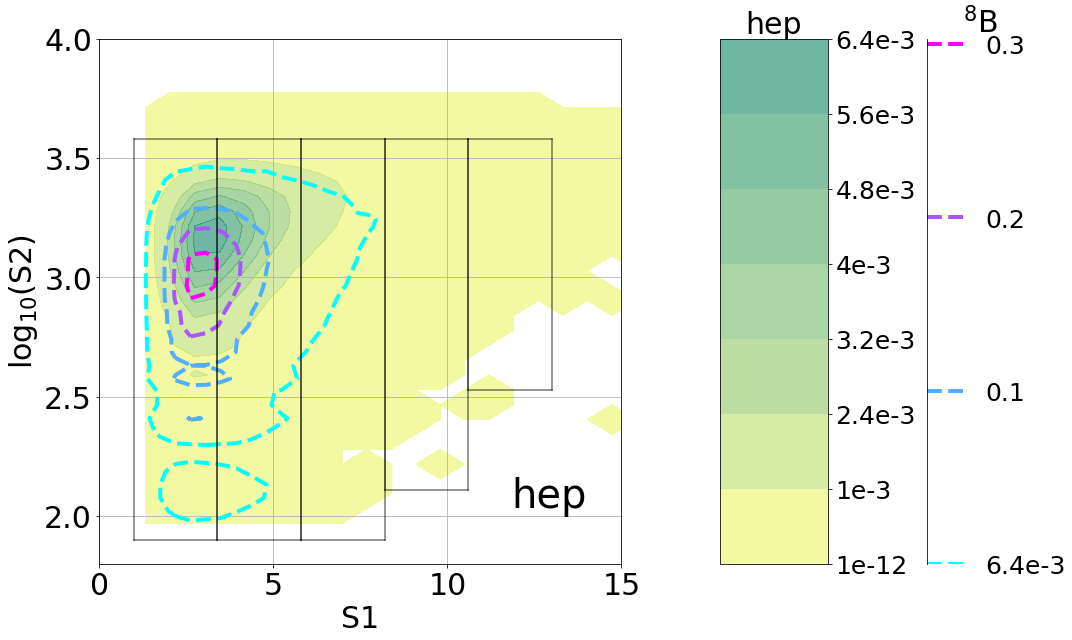

In [5]:
signal_pcle = 'hep'
fig = plt.figure(figsize=(15, 9 ))
gs = gridspec.GridSpec(1, 5)
ax = plt.subplot(gs[0:1,0:3])
xlabel = 'S1'
ylabel = r'log$_{10}$(S2)'
detector = 'SURF'
file_name = file_name_prefix+signal_pcle+'.csv'
optimized_bin_dets = pd.read_csv(file_name, index_col = 0)
print(file_name)

ax = setup_cdfpdf_ax(ax,'', xlabel, ylabel, True, '', 30,30, 
                    vlines = [0,0], hlines = [0,0], 
                         xlims = [0, 15], ylims = [1.8, 4], log = [0,0])
ax.text(14, 2, get_official_pcle(signal_pcle), 
                  horizontalalignment='right', verticalalignment='bottom',
                  fontsize = 40)
_, _, pcles_det, _, _ = get_null_NR(signal_pcle, detector)
pcles_det = ['8B']+pcles_det
bins_groups_det = [literal_eval(a) for a in 
               [subbin for subbin in list(optimized_bin_dets['hep']) if str(subbin)!='nan']]
levels_hep = [1e-12,1e-3,0.0024,0.0032, 0.004,0.0048, 0.0056, 0.0064]
levels_8B = [0.0064, 0.1, 0.2, 0.3]
print(pcles_det, file_name)
for pcle_det in pcles_det:
    file_name_pcle = os.path.join(folder_2d, 'S1S2_'+pcle_det+'.csv')
    

    dataf = pd.read_csv(file_name_pcle)
    eff_num = len(dataf)
    valid_dataf = dataf.loc[(dataf['cS1[phd]'] > 0 ) & (dataf['cS2[phd]']>0) ]

    s1 = valid_dataf['cS1[phd]']
    log10s2 = np.log10(valid_dataf['cS2[phd]'])
    
    eventR, _, _, _, _, _ = read_pcle_cdf(pcle_det, nuclei_2d, E_threshold_keV, '', recoil_type = '',
                      read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, 
                                              metallicity = metallicity, ebind = True, plot_pdf = False, corr = '')
    
    DT_longtime = eff_num/eventR
    print(pcle_det, eventR, eff_num, DT_longtime)
    counts_all,xbins_all, ybins_all= np.histogram2d(s1, log10s2, bins =[30, 30])
    if '8B' in pcle_det:
  
        cpline1 = ax.contour((xbins_all[1:]+xbins_all[:-1])/2, 
                           (ybins_all[1:]+ybins_all[:-1])/2, 
                           (counts_all).T/DT_longtime, cmap ='cool'
                          ,levels = levels_8B
                             , linewidths = 4, linestyles = '--'
                            )

        
    else:
        
        cp2 = ax.contourf((xbins_all[1:]+xbins_all[:-1])/2, 
                       (ybins_all[1:]+ybins_all[:-1])/2, 
                       (counts_all).T /DT_longtime
                          , levels = levels_hep
                          , cmap ='summer_r', alpha = 0.6)#
 

    for bins_info in bins_groups_det:
        binS1_min, binS1_max, binlog10S2_min, binlog10S2_max, binnumberx, binnumbery = bins_info
        counts,xbins, ybins = np.histogram2d(s1, log10s2, bins =[binnumberx, binnumbery]
                                   ,range = [[binS1_min, binS1_max], [binlog10S2_min, binlog10S2_max]]
                                   )

        
        
        ax.plot([min(xbins), min(xbins)], [min(ybins), max(ybins)], color ='black', alpha = 0.3)
        ax.plot([max(xbins), max(xbins)], [min(ybins), max(ybins)], color ='black', alpha = 0.3)
        ax.plot([min(xbins), max(xbins)], [min(ybins), min(ybins)], color ='black', alpha = 0.3)
        ax.plot([min(xbins), max(xbins)], [max(ybins), max(ybins)], color ='black', alpha = 0.3)
        '''
        for i in range(0, len(xbins)-1):
            for j in range(0, len(ybins)-1):
                ax.plot([xbins[i], xbins[i+1]], [ybins[j], ybins[j]],  color ='black', ls = '--')

        for j in range(0, len(ybins)-1):
            for i in range(0, len(xbins)-1):
                ax.plot([xbins[i], xbins[i]], [ybins[j], ybins[j+1]],  color ='black', ls = '--')
        '''
                
cbar2 = fig.colorbar(cp2, ax=ax, cax=plt.subplot(gs[0:1,3]), ticks=levels_hep)
#cbar2.add_lines(cpline2)
cbar2.ax.set_title(get_official_pcle('hep'), fontsize=30)

cbar2.ax.set_yticklabels( ["{:.2g}".format(i) if i>0.01 else "{:.1e}".format(i).replace('-0','-').replace('.0','') 
                           for i in levels_hep ]) 
cbar2.ax.tick_params(labelsize=25) 
cbar2.ax.spines['right'].set_visible(False)
cbar2.ax.spines['top'].set_visible(False)
cbar2.ax.spines['bottom'].set_visible(False)

legend_ticks = np.arange(0, len(levels_8B), 1)
ax_legend=plt.subplot(gs[0:1,4])
ax_legend.hlines(legend_ticks, 0,0.5, 
                 colors = [pc.get_edgecolor() for pc in cpline1.collections],
                 ls = ['--']*len(cpline1.collections),
                lw = [pc.get_linewidths()[0] for pc in cpline1.collections])
ax_legend = setup_cdfpdf_ax(ax_legend,get_official_pcle('8B'), '', '', False, '', 25,30, 
                    vlines = [0,0], hlines = [0,0], 
                         xlims = [0, 1.5], ylims = [0, (len(levels_8B)-1)*1.01], log = [0,0])
ax_legend.tick_params(axis='x', which='both',bottom=False,top=False,   labelbottom=False)
ax_legend.tick_params(axis='y', which='both',left=False,right=False,   labelleft=False,  labelright=True)
ax_legend.set_yticks(legend_ticks)

ax_legend.set_yticklabels(["{:.2g}".format(i) if i>0.01 else "{:.1e}".format(i).replace('-0','-').replace('.0','') 
                          for i in levels_8B ])
ax_legend.tick_params(axis="y",direction="in", pad=-50)
ax_legend.spines['right'].set_visible(False)
ax_legend.spines['top'].set_visible(False)
ax_legend.spines['bottom'].set_visible(False)

fig.tight_layout(rect=[0, 0, 1, 1])

In [6]:
save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'hep_method2_consecutive_region_thrd0.pdf')
print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/hep_method2_consecutive_region_thrd0.pdf


# dsnb

optimized_consecutive_binning_thrd0_dsnb.csv
['atmNu_SURF_avg', 'dsnb'] optimized_consecutive_binning_thrd0_dsnb.csv
NR
 ../real_data_nest/pdf/atmNu_SURF_avg_NR_Xenon_pdf.txt
survival
atmNu_SURF_avg 0.07489834482058429 1 / (t yr) 10000000 133514298.93350197 t yr
NR
survival
dsnb 0.05463025667101728 1 / (t yr) 10000006 183048856.24499094 t yr


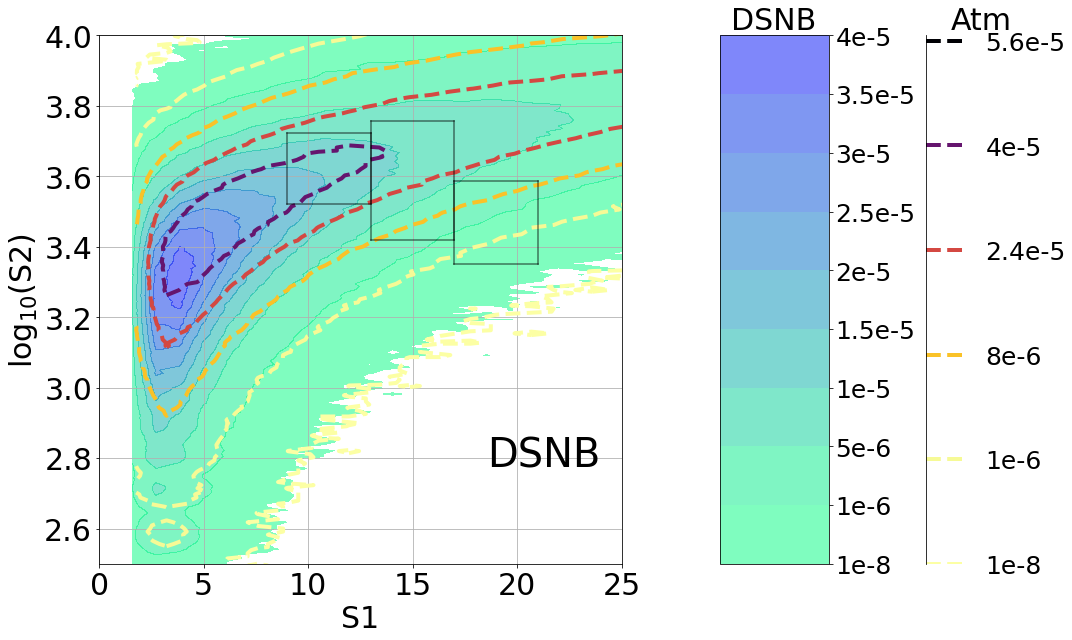

In [7]:
signal_pcle = 'dsnb'
fig = plt.figure(figsize=(15, 9 ))
gs = gridspec.GridSpec(1, 5)
ax = plt.subplot(gs[0:1,0:3])
xlabel = 'S1'
ylabel = r'log$_{10}$(S2)'
detector = 'SURF'
file_name =  file_name_prefix+signal_pcle+'.csv'
optimized_bin_dets = pd.read_csv(file_name, index_col = 0)
print(file_name)

ax = setup_cdfpdf_ax(ax,'', xlabel, ylabel, True, '', 30,30, 
                        vlines = [0,0], hlines = [0,0], 
                             xlims = [0,25], ylims = [2.5, 4], log = [0,0])
ax.text(24, 2.75, get_official_pcle(signal_pcle), 
                          horizontalalignment='right', verticalalignment='bottom',
                          fontsize = 40)
    
_, _, pcles_det, _, _ = get_null_NR(signal_pcle, detector)
pcles_det = ['atmNu_'+detector+'_avg']+pcles_det
bins_groups_det = [literal_eval(a) for a in 
               [subbin for subbin in list(optimized_bin_dets['dsnb']) if str(subbin)!='nan']]
levels_dsnb = [1e-8, 1e-6,0.5e-5, 1e-5, 1.5e-5, 2e-5, 2.5e-5, 3e-5, 3.5e-5, 4e-5]
levels_atm = [1e-8, 1e-6, 0.8e-5, 2.4e-5,  4e-5,  5.6e-5]
print(pcles_det, file_name)
for pcle_det in pcles_det:
    file_name_pcle = os.path.join(folder_2d, 'S1S2_'+pcle_det+'.csv')
    

    dataf = pd.read_csv(file_name_pcle)
    eff_num = len(dataf)
    valid_dataf = dataf.loc[(dataf['cS1[phd]'] > 0 ) & (dataf['cS2[phd]']>0) ]

    s1 = valid_dataf['cS1[phd]']
    log10s2 = np.log10(valid_dataf['cS2[phd]'])
    
    eventR, _, _, _, _, _ = read_pcle_cdf(pcle_det, nuclei_2d, E_threshold_keV, '', recoil_type = '',
                      read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, 
                                              metallicity = metallicity, ebind = True, plot_pdf = False, corr = '')

    DT_longtime = eff_num/eventR
    print(pcle_det, eventR, eff_num, DT_longtime)
    counts_all,xbins_all, ybins_all= np.histogram2d(s1, log10s2, bins =[300, 300])
    if 'atm' in pcle_det:
     
        cpline1 = ax.contour((xbins_all[1:]+xbins_all[:-1])/2, 
                           (ybins_all[1:]+ybins_all[:-1])/2, 
                           (counts_all).T/DT_longtime, cmap ='inferno_r'
                           ,levels = levels_atm
                             , linewidths = 4, linestyles = '--'
                            )

        
    else:
        cp2 = ax.contourf((xbins_all[1:]+xbins_all[:-1])/2, 
                       (ybins_all[1:]+ybins_all[:-1])/2, 
                       (counts_all).T /DT_longtime
                        ,   levels = levels_dsnb
                          , cmap ='winter_r', alpha = 0.5)#

    for bins_info in bins_groups_det:
        binS1_min, binS1_max, binlog10S2_min, binlog10S2_max, binnumberx, binnumbery = bins_info
        counts,xbins, ybins = np.histogram2d(s1, log10s2, bins =[binnumberx, binnumbery]
                                   ,range = [[binS1_min, binS1_max], [binlog10S2_min, binlog10S2_max]]
                                   )

        
        
        ax.plot([min(xbins), min(xbins)], [min(ybins), max(ybins)], color ='black', alpha = 0.3)
        ax.plot([max(xbins), max(xbins)], [min(ybins), max(ybins)], color ='black', alpha = 0.3)
        ax.plot([min(xbins), max(xbins)], [min(ybins), min(ybins)], color ='black', alpha = 0.3)
        ax.plot([min(xbins), max(xbins)], [max(ybins), max(ybins)], color ='black', alpha = 0.3)
        '''
        for i in range(0, len(xbins)-1):
            for j in range(0, len(ybins)-1):
                ax.plot([xbins[i], xbins[i+1]], [ybins[j], ybins[j]],  color ='black', ls = '--')

        for j in range(0, len(ybins)-1):
            for i in range(0, len(xbins)-1):
                ax.plot([xbins[i], xbins[i]], [ybins[j], ybins[j+1]],  color ='black', ls = '--')
        '''
                
cbar2 = fig.colorbar(cp2, ax=ax, cax=plt.subplot(gs[0:1,3]), ticks=levels_dsnb)
cbar2.ax.set_title(get_official_pcle('dsnb'), fontsize=30)
cbar2.ax.set_yticklabels( ["{:.2g}".format(i) if i>0.01 else "{:.1e}".format(i).replace('-0','-').replace('.0','') 
                           for i in levels_dsnb ]) 
cbar2.ax.tick_params(labelsize=25) 
cbar2.ax.spines['right'].set_visible(False)
cbar2.ax.spines['top'].set_visible(False)
cbar2.ax.spines['bottom'].set_visible(False)

legend_ticks = np.arange(0, len(levels_atm), 1)
ax_legend=plt.subplot(gs[0:1,4])
ax_legend.hlines(legend_ticks, 0,0.5, 
                 colors = [pc.get_edgecolor() for pc in cpline1.collections],
                 ls = ['--']*len(cpline1.collections),
                lw = [pc.get_linewidths()[0] for pc in cpline1.collections])
ax_legend = setup_cdfpdf_ax(ax_legend,get_official_pcle('atm'), '', '', False, '', 25,30, 
                    vlines = [0,0], hlines = [0,0], 
                         xlims = [0, 1.5], ylims = [0, (len(levels_atm)-1)*1.01 ], log = [0,0])
ax_legend.tick_params(axis='x', which='both',bottom=False,top=False,   labelbottom=False)
ax_legend.tick_params(axis='y', which='both',left=False,right=False,   labelleft=False,  labelright=True)
ax_legend.set_yticks(legend_ticks)

ax_legend.set_yticklabels(["{:.2g}".format(i) if i>0.01 else "{:.1e}".format(i).replace('-0','-').replace('.0','') 
                          for i in levels_atm ])
#ax.tick_params(axis="y",direction="in", pad=-22)
ax_legend.tick_params(axis="y",direction="in", pad=-50)
ax_legend.spines['right'].set_visible(False)
ax_legend.spines['top'].set_visible(False)
ax_legend.spines['bottom'].set_visible(False)

fig.tight_layout(rect=[0, 0, 1, 1])


In [8]:
save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'dsnb_method2_consecutive_region_thrd0.pdf')
print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/dsnb_method2_consecutive_region_thrd0.pdf
